In [8]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans


import networkx as nx
from networkx.algorithms import community

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Here is visualization of the graph.  We can ignore actions and only consider the Laplacian

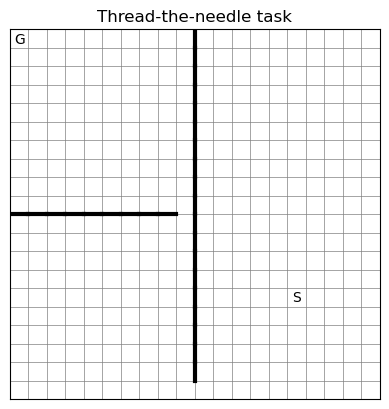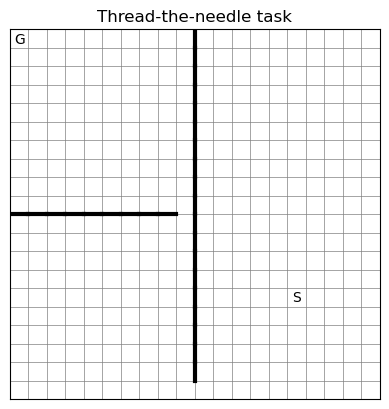

In [4]:
laplacian = np.loadtxt('simulations/grid_world_laplacian.csv', delimiter=',')
print(laplacian.shape)
laplacian

(400, 400)


array([[ 2., -1.,  0., ...,  0.,  0.,  0.],
       [-1.,  3., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  3., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  3., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  3., -1.],
       [ 0.,  0.,  0., ...,  0., -1.,  2.]])

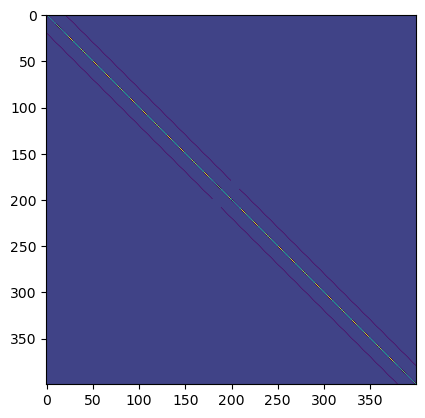

In [6]:
plt.imshow(laplacian)

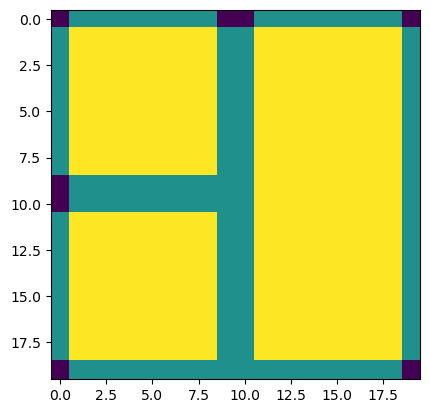

In [66]:
# plot the degree matrix, reshaped into the grid-world shape
plt.imshow(np.diag(laplacian).reshape(20, 20))

In [22]:
# convert the laplacian into a graph
edges = np.argwhere(laplacian)
edges = [(i, j) for i, j in edges if i != j]  # remove self-edges

G = nx.Graph()
G.add_edges_from(edges)
print(nx.laplacian_matrix(G).toarray())


[[ 2 -1 -1 ...  0  0  0]
 [-1  3  0 ...  0  0  0]
 [-1  0  3 ...  0  0  0]
 ...
 [ 0  0  0 ...  3 -1  0]
 [ 0  0  0 ... -1  3 -1]
 [ 0  0  0 ...  0 -1  2]]


In [23]:
edges

[(0, 1),
 (0, 20),
 (1, 0),
 (1, 2),
 (1, 21),
 (2, 1),
 (2, 3),
 (2, 22),
 (3, 2),
 (3, 4),
 (3, 23),
 (4, 3),
 (4, 5),
 (4, 24),
 (5, 4),
 (5, 6),
 (5, 25),
 (6, 5),
 (6, 7),
 (6, 26),
 (7, 6),
 (7, 8),
 (7, 27),
 (8, 7),
 (8, 9),
 (8, 28),
 (9, 8),
 (9, 29),
 (10, 11),
 (10, 30),
 (11, 10),
 (11, 12),
 (11, 31),
 (12, 11),
 (12, 13),
 (12, 32),
 (13, 12),
 (13, 14),
 (13, 33),
 (14, 13),
 (14, 15),
 (14, 34),
 (15, 14),
 (15, 16),
 (15, 35),
 (16, 15),
 (16, 17),
 (16, 36),
 (17, 16),
 (17, 18),
 (17, 37),
 (18, 17),
 (18, 19),
 (18, 38),
 (19, 18),
 (19, 39),
 (20, 0),
 (20, 21),
 (20, 40),
 (21, 1),
 (21, 20),
 (21, 22),
 (21, 41),
 (22, 2),
 (22, 21),
 (22, 23),
 (22, 42),
 (23, 3),
 (23, 22),
 (23, 24),
 (23, 43),
 (24, 4),
 (24, 23),
 (24, 25),
 (24, 44),
 (25, 5),
 (25, 24),
 (25, 26),
 (25, 45),
 (26, 6),
 (26, 25),
 (26, 27),
 (26, 46),
 (27, 7),
 (27, 26),
 (27, 28),
 (27, 47),
 (28, 8),
 (28, 27),
 (28, 29),
 (28, 48),
 (29, 9),
 (29, 28),
 (29, 49),
 (30, 10),
 (30, 31),


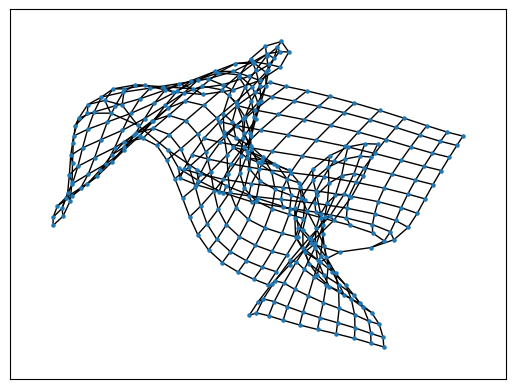

In [26]:
nx.draw_networkx(G, with_labels=False, node_size=5)

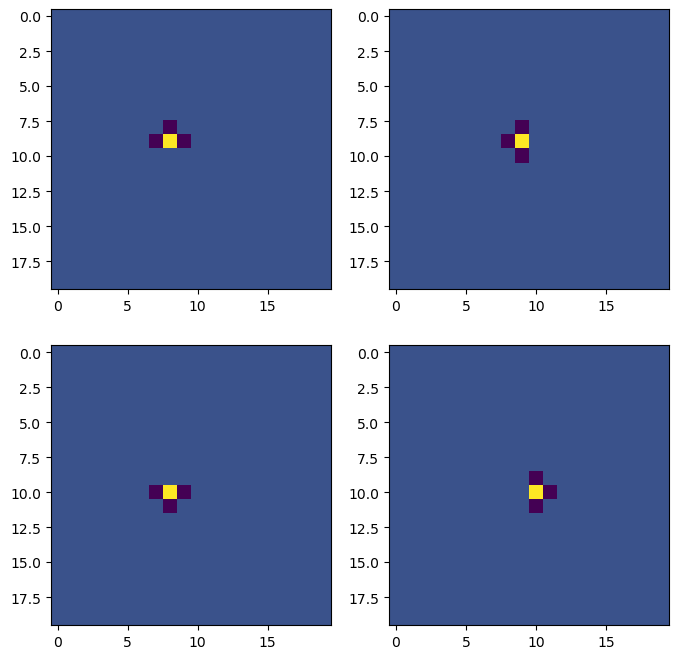

In [67]:
# the adjacency matrix looked wrong to me at first glance, but it's correct.  Bottleneck states
# don't necessarily have a different degree than their neighbors.  There is a bottle neck between
# the states at row 9 and row 10, column 9. Importantly, while the adjacency pattern changes, the 
# degree doesn't


fig, axes = plt.subplots(2,2,figsize=(8, 8) )

row = 9
col = 8
state = row * 20 + col
axes[0][0].imshow(laplacian[state].reshape(20, 20))

row = 10
col = 8
state = row * 20 + col
axes[1][0].imshow(laplacian[state].reshape(20, 20))

row = 9
col = 9
state = row * 20 + col
axes[0][1].imshow(laplacian[state].reshape(20, 20))

row = 10
col = 10
state = row * 20 + col
axes[1][1].imshow(laplacian[state].reshape(20, 20))


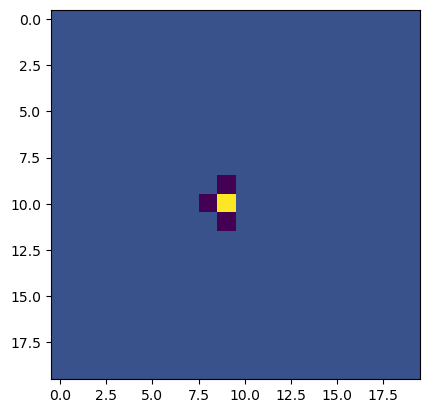

In [68]:

row = 10
col = 9

state = row * 20 + col
plt.imshow(laplacian[state].reshape(20, 20))

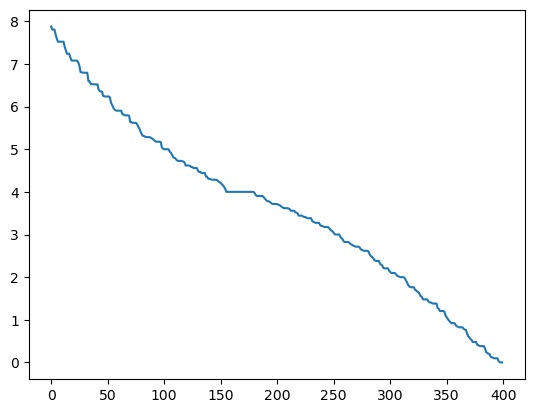

In [108]:
eigenvalues, eigenvectors = np.linalg.eig(laplacian)

idx = np.argsort(eigenvalues)[::-1]

# sort by the eigenvalues
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

plt.plot(eigenvalues)

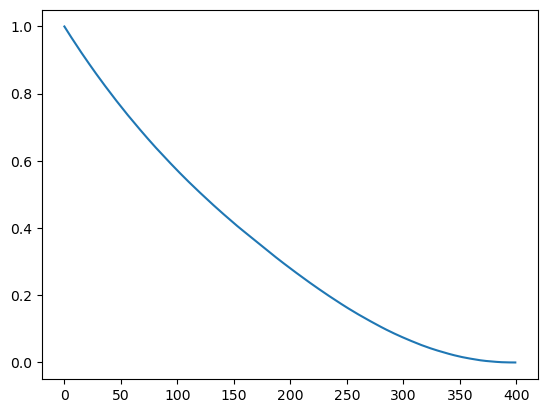

In [149]:
plt.plot(eigenvalues[::-1].cumsum()[::-1] / eigenvalues.sum())

In [173]:
eigenvalues[-2]

0.0018319775686677384

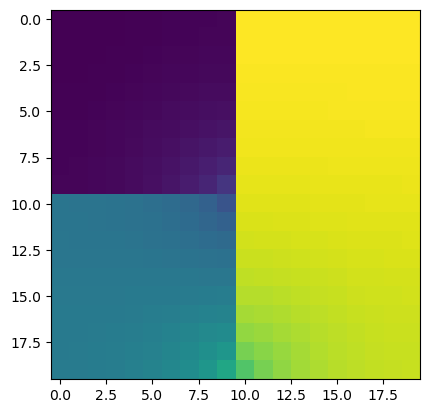

In [196]:
plt.imshow(eigenvectors[:, -2].reshape(20, 20))

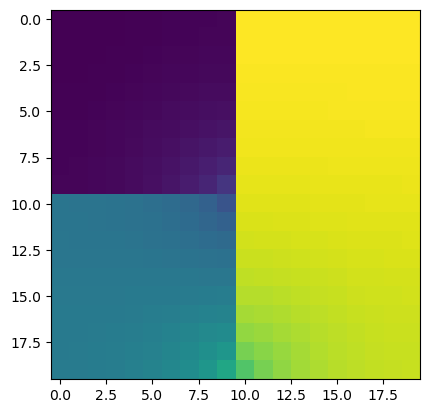

In [211]:
plt.imshow(eigenvectors[:, -2].reshape(20, 20) - eigenvectors[-1, -2])

In [210]:
eigenvectors[-1, -2]

0.04226083440271653

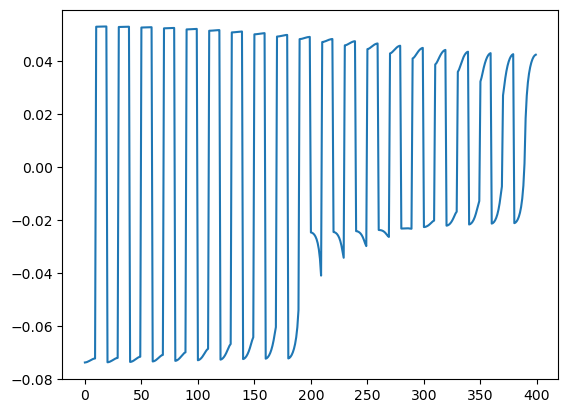

In [206]:
plt.plot((eigenvectors[:, -2]))

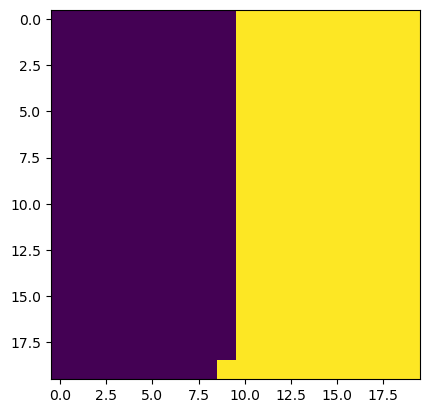

In [198]:
plt.imshow(eigenvectors[:, -2].reshape(20, 20) > 0)

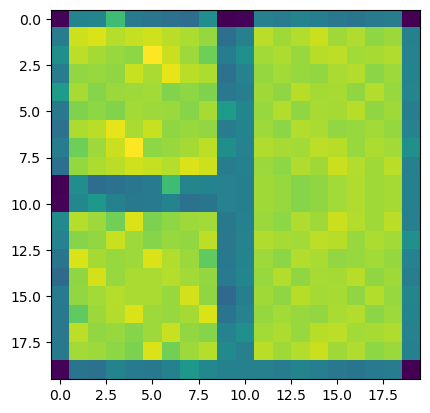

In [181]:
n = 20

l_hat = eigenvectors @ np.diag(eigenvalues) @ eigenvectors.T
plt.imshow(np.diag(l_hat).reshape(20, 20))

In [182]:
eigenvectors.shape

(400, 400)

In [183]:
laplacian.shape

(400, 400)

In [184]:
laplacian @ eigenvectors[:, -1] - eigenvalues[-1] * eigenvectors[:, -1] 

array([ 8.96103938e-16,  3.20175744e-16, -5.95758252e-16,  9.03042831e-16,
       -1.65546830e-16,  3.89564683e-16,  5.14464773e-16,  4.26199874e-17,
        2.23031229e-16,  4.26199874e-17,  6.46303757e-16, -4.06467394e-17,
        6.80998227e-16, -1.37791254e-16,  3.75686895e-16, -2.76569132e-16,
        4.03442470e-16,  7.03755630e-17,  6.11609288e-16,  7.03755630e-17,
        4.17320258e-16,  2.64664592e-16,  1.19447638e-15,  1.31937647e-15,
        1.22223195e-15, -1.28911638e-17,  4.86709197e-16, -5.95758252e-16,
       -9.61578907e-17,  6.25487075e-16, -4.08408116e-16,  8.33653892e-16,
       -5.68002676e-16,  6.11609288e-16, -6.09636040e-16,  1.76346568e-15,
        9.81311386e-17,  7.50387166e-16, -2.48813557e-16,  4.03442470e-16,
        3.40992425e-16,  8.19776105e-16,  3.34053531e-16,  1.63856559e-15,
        8.19776105e-16,  3.34053531e-16,  7.64264953e-16,  3.34053531e-16,
        4.17320258e-16,  8.33653892e-16,  5.56098136e-16, -1.30352543e-15,
        1.70795452e-15, -

In [185]:
np.linalg.norm(eigenvectors[:, 0])

0.9999999999999999

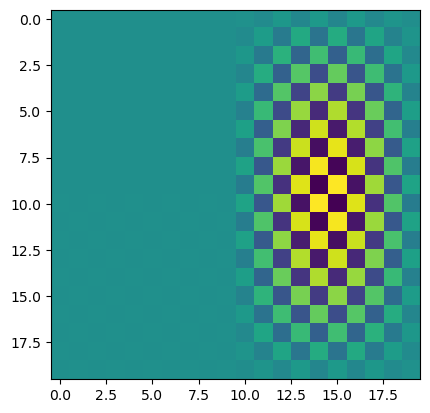

In [186]:
plt.imshow(eigenvectors[:, 0].reshape(20, 20))

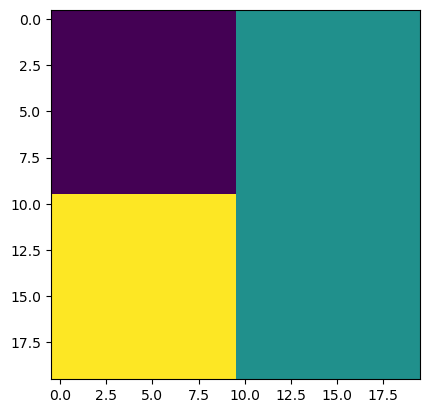

In [200]:
# the goal is to cluster the principal eigenvector, which is the second to last column of the eigenvector matrix

kmeans = KMeans(n_clusters=3,  n_init="auto"
               ).fit(eigenvectors[:, -2].reshape(-1, 1))

plt.imshow(kmeans.labels_.reshape(20, 20))

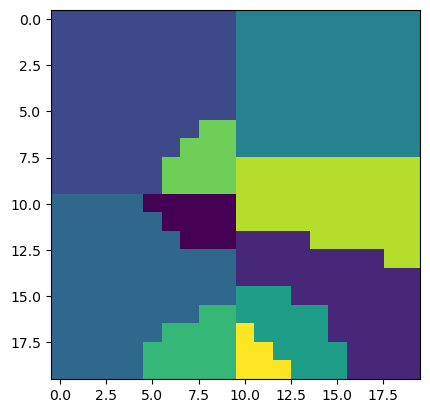

In [199]:
# the goal is to cluster the principal eigenvector, which is the second to last column of the eigenvector matrix

kmeans = KMeans(n_clusters=10,  n_init="auto"
               ).fit(eigenvectors[:, -2].reshape(-1, 1))

plt.imshow(kmeans.labels_.reshape(20, 20))

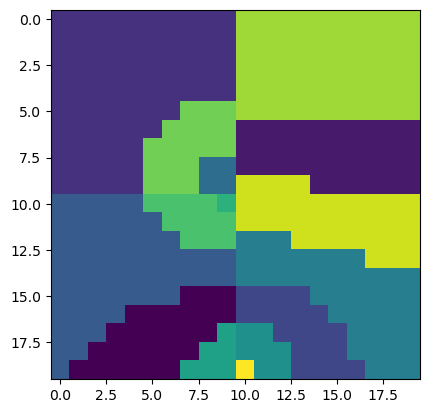

In [204]:
# the goal is to cluster the principal eigenvector, which is the second to last column of the eigenvector matrix

kmeans = KMeans(n_clusters=15,n_init="auto"
               ).fit(eigenvectors[:, -2].reshape(-1, 1))

plt.imshow(kmeans.labels_.reshape(20, 20))

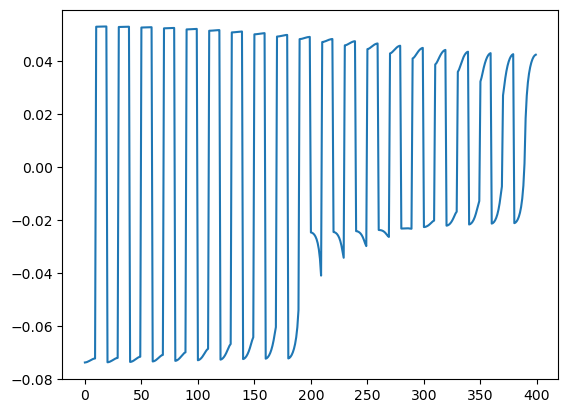

In [190]:
plt.plot(eigenvectors[:, -2].reshape(-1))